In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/nnnnntt/net.csv')

In [3]:
df.info

<bound method DataFrame.info of          Dst Port  Protocol  Bwd Pkt Len Min  Flow Byts/s  Fwd IAT Mean  \
0             445         6                0   1230.56750  1.281252e+05   
1              80         6                0      0.00000  1.410000e+02   
2             445         6                0      0.00000  1.297940e+05   
3              80         6                0      0.00000  9.400000e+01   
4             443         6                0     54.15252  5.804901e+06   
...           ...       ...              ...          ...           ...   
4529985         0         0                0      0.00000  1.054111e+03   
4529986     51395         6                0      0.00000  3.433530e+05   
4529987     51397         6                0      0.00000  3.433327e+05   
4529988     51396         6                0      0.00000  3.433390e+05   
4529989     51390         6                0      0.00000  3.436120e+05   

         Fwd IAT Min  Bwd IAT Tot   Bwd IAT Std  Bwd IAT Max  Bwd I

In [4]:
df.isnull().sum()

Dst Port             0
Protocol             0
Bwd Pkt Len Min      0
Flow Byts/s          0
Fwd IAT Mean         0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Bwd PSH Flags        0
Bwd URG Flags        0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Std          0
Pkt Len Var          0
FIN Flag Cnt         0
SYN Flag Cnt         0
PSH Flag Cnt         0
ACK Flag Cnt         0
URG Flag Cnt         0
CWE Flag Count       0
ECE Flag Cnt         0
Down/Up Ratio        0
Fwd Seg Size Avg     0
Bwd Seg Size Avg     0
Fwd Byts/b Avg       0
Fwd Pkts/b Avg       0
Fwd Blk Rate Avg     0
Bwd Byts/b Avg       0
Bwd Pkts/b Avg       0
Bwd Blk Rate Avg     0
Subflow Fwd Byts     0
Subflow Bwd Byts     0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Fwd Act Data Pkts    0
Fwd Seg Size Min     0
Active Std           0
Active Max           0
Active Min           0
Idle Max             0
Idle Min   

In [5]:
df.duplicated().sum()

1263368

In [6]:
df.shape

(4529990, 46)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(3266622, 46)

In [9]:
df.Label.value_counts()

Label
Benign           2024432
DDoS attack       693392
DoS attack        170409
Botnet            144535
Infilteration     138953
Brute-force        94043
Web attack           858
Name: count, dtype: int64

In [3]:
df.head(3)

Dst Port  Protocol  Bwd Pkt Len Min  Flow Byts/s  Fwd IAT Mean  \
0       445         6                0    1230.5675    128125.164   
1        80         6                0       0.0000       141.000   
2       445         6                0       0.0000    129794.000   

   Fwd IAT Min  Bwd IAT Tot  Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  ...  \
0            3       615495    1773.4973       156504       152741  ...   
1          141            0       0.0000            0            0  ...   
2            0            0       0.0000            0            0  ...   

   Init Bwd Win Byts  Fwd Act Data Pkts  Fwd Seg Size Min  Active Std  \
0                255                  4                20         0.0   
1                 -1                  0                20         0.0   
2               8192                  0                20         0.0   

   Active Max  Active Min  Idle Max  Idle Min  Threat   Label  
0           0           0         0         0  Benign  Benign  
1           0           0         0         0  Benign  Benign  
2           0           0         0         0  Benign  Benign  

[3 rows x 46 columns]

In [ ]:
from sklearn.model_selection import train_test_split
label_col = "Label"
feature_cols = list(df.columns)
feature_cols

['Dst Port',
 'Protocol',
 'Bwd Pkt Len Min',
 'Flow Byts/s',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Bwd IAT Tot',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Pkts/s',
 'Bwd Pkts/s',
 'Pkt Len Min',
 'Pkt Len Std',
 'Pkt Len Var',
 'FIN Flag Cnt',
 'SYN Flag Cnt',
 'PSH Flag Cnt',
 'ACK Flag Cnt',
 'URG Flag Cnt',
 'CWE Flag Count',
 'ECE Flag Cnt',
 'Down/Up Ratio',
 'Fwd Seg Size Avg',
 'Bwd Seg Size Avg',
 'Fwd Byts/b Avg',
 'Fwd Pkts/b Avg',
 'Fwd Blk Rate Avg',
 'Bwd Byts/b Avg',
 'Bwd Pkts/b Avg',
 'Bwd Blk Rate Avg',
 'Subflow Fwd Byts',
 'Subflow Bwd Byts',
 'Init Fwd Win Byts',
 'Init Bwd Win Byts',
 'Fwd Act Data Pkts',
 'Fwd Seg Size Min',
 'Active Std',
 'Active Max',
 'Active Min',
 'Idle Max',
 'Idle Min',
 'Threat',
 'Label']

In [13]:
label_col = 'Label'

feature_cols.remove("Threat")
feature_cols.remove(label_col)

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=2, shuffle=True, stratify=df[label_col])

In [15]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

minmax_scaler = MinMaxScaler()
train_df[feature_cols] = minmax_scaler.fit_transform(train_df[feature_cols])
test_df[feature_cols] = minmax_scaler.transform(test_df[feature_cols])

In [16]:
import numpy as np
order_label_list = list(np.unique(train_df[label_col]))
order_label_list

['Benign', 'Botnet', 'Brute-force', 'DDoS attack', 'DoS attack', 'Web attack']

In [17]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                 classes=order_label_list,
                                                 y=train_df[label_col].values)

class_weights = {k: v for k,v in enumerate(class_weights)}
class_weights

{0: 0.5989924086189731,
 1: 1.4727671107128417,
 2: 1.1055478991320897,
 3: 0.6149151784492121,
 4: 0.8959360997726397,
 5: 216.66961414790995}

In [18]:
y_train = [order_label_list.index(k) for k in train_df[label_col]]
y_test = [order_label_list.index(k) for k in test_df[label_col]]

In [17]:
import tensorflow as tf
# Convert data to TensorFlow tensors
X_train = tf.convert_to_tensor(train_df[feature_cols].values, dtype=tf.float32)
X_test = tf.convert_to_tensor(test_df[feature_cols].values, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.int32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(64).shuffle(buffer_size=1024)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

Using device: cuda
Training Deep Neural Network...
Epoch 5/30, Train Loss: 0.1076, Train Acc: 0.9557, Val Loss: 0.0928, Val Acc: 0.9620
Epoch 10/30, Train Loss: 0.0976, Train Acc: 0.9601, Val Loss: 0.0932, Val Acc: 0.9657
Early stopping triggered after 11 epochs (no improvement for 5 epochs)


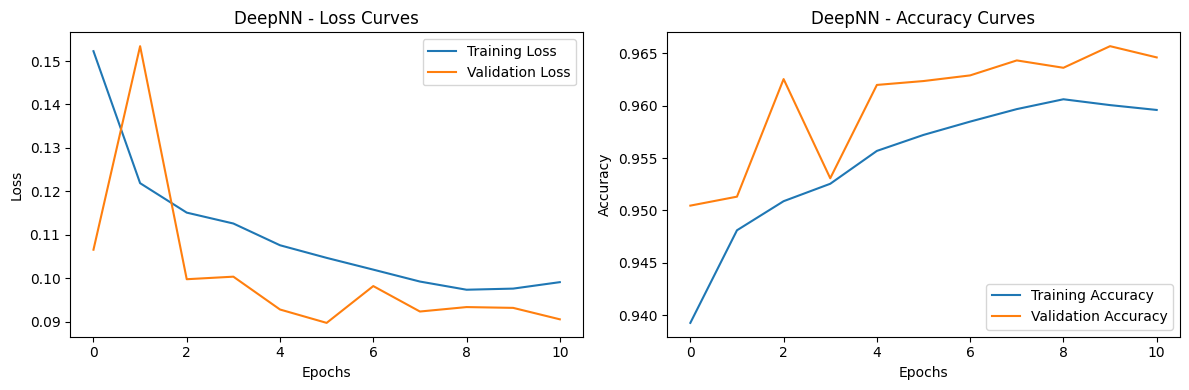

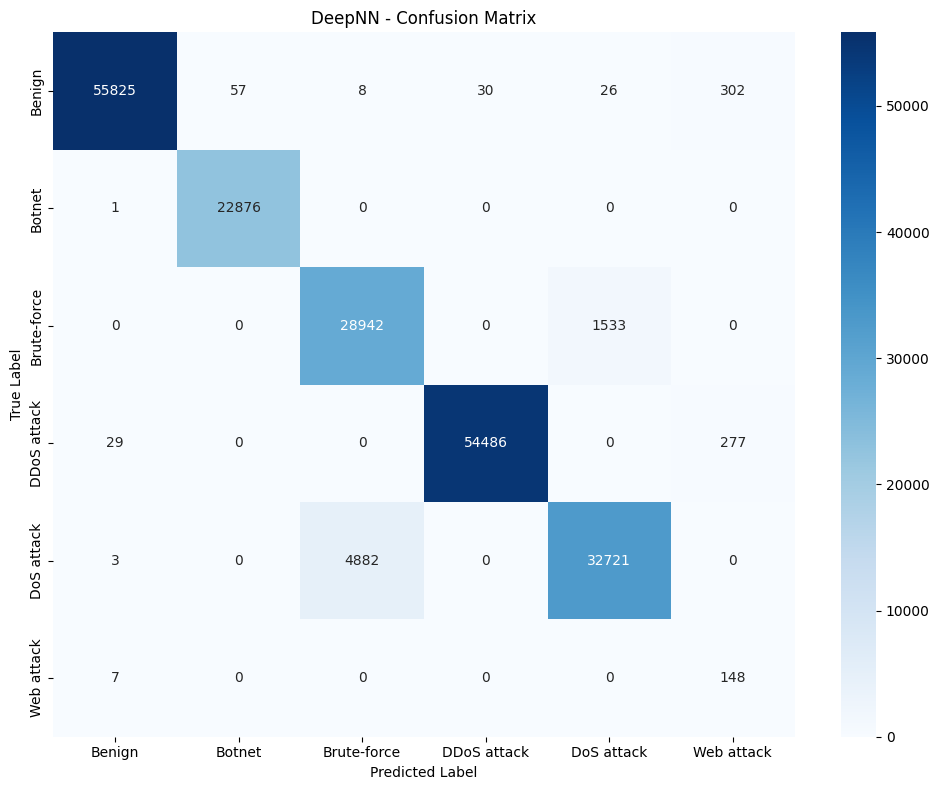

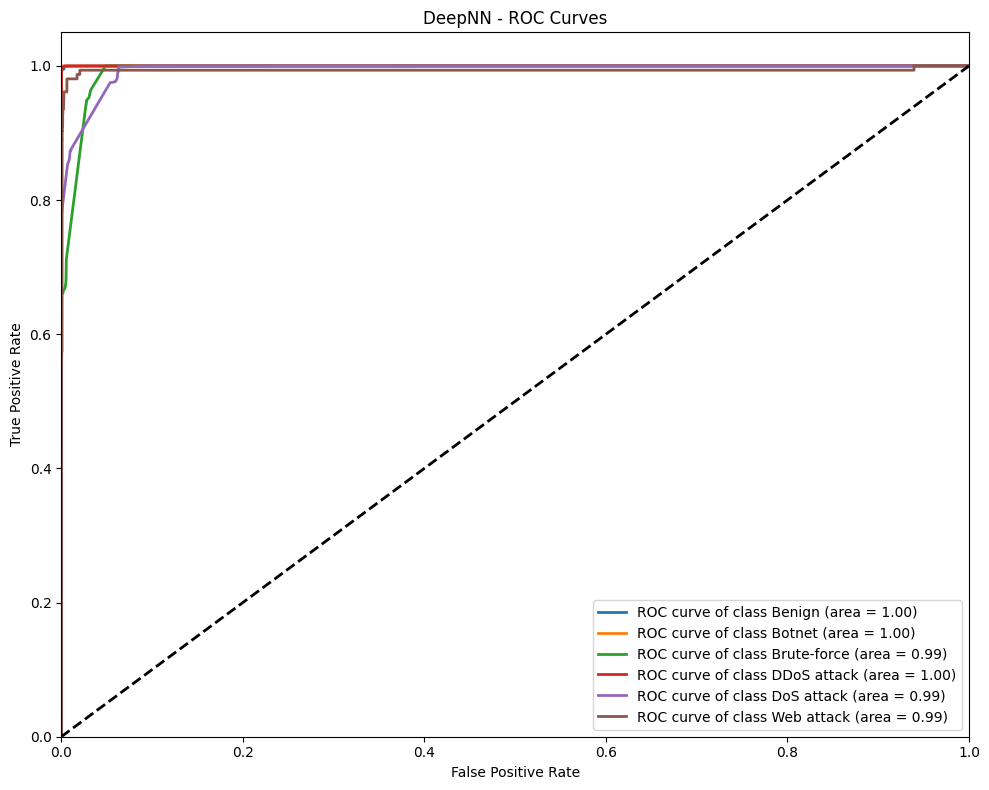


DeepNN Results:
Accuracy: 0.9646

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.99      1.00     56248
      Botnet       1.00      1.00      1.00     22877
 Brute-force       0.86      0.95      0.90     30475
 DDoS attack       1.00      0.99      1.00     54792
  DoS attack       0.95      0.87      0.91     37606
  Web attack       0.20      0.95      0.34       155

    accuracy                           0.96    202153
   macro avg       0.83      0.96      0.86    202153
weighted avg       0.97      0.96      0.97    202153


Training CNN...
Epoch 5/30, Train Loss: 0.0857, Train Acc: 0.9642, Val Loss: 1.5185, Val Acc: 0.9647
Early stopping triggered after 8 epochs (no improvement for 5 epochs)


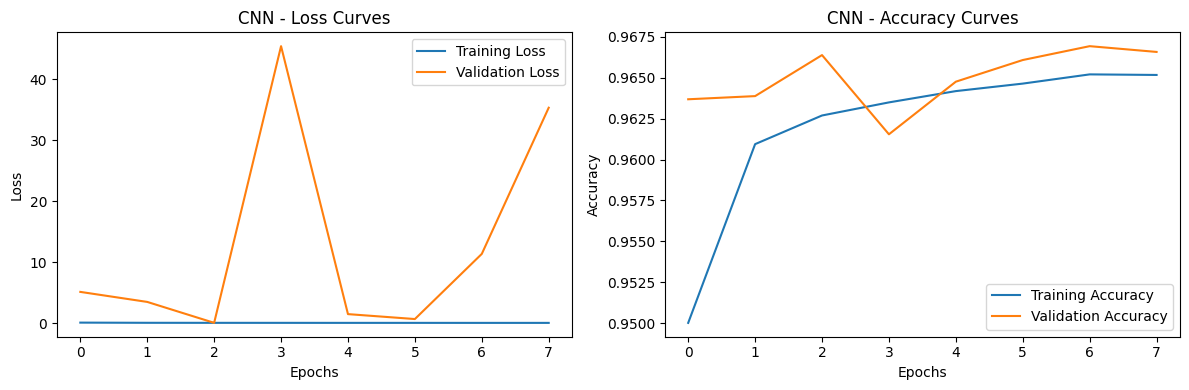

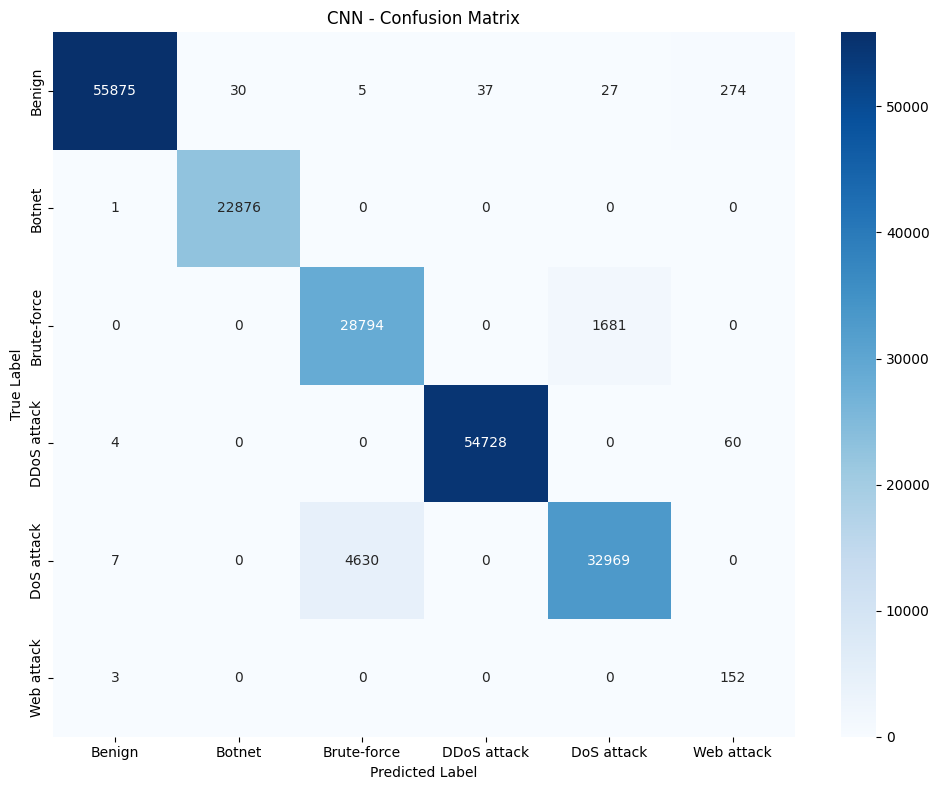

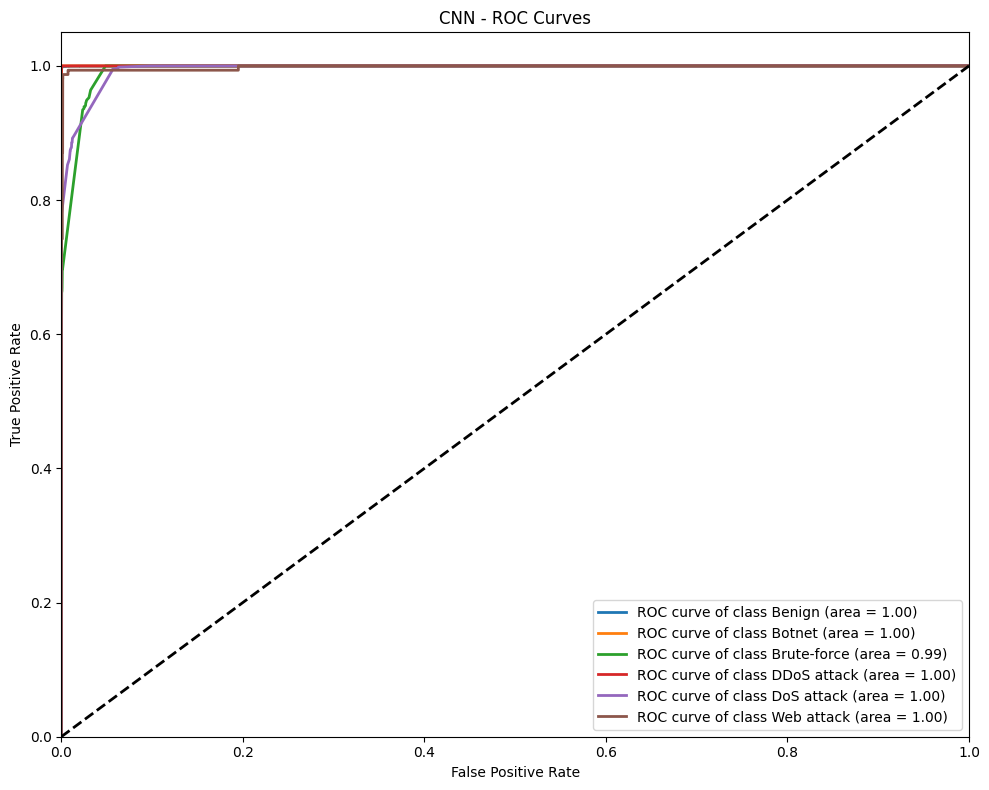


CNN Results:
Accuracy: 0.9666

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.99      1.00     56248
      Botnet       1.00      1.00      1.00     22877
 Brute-force       0.86      0.94      0.90     30475
 DDoS attack       1.00      1.00      1.00     54792
  DoS attack       0.95      0.88      0.91     37606
  Web attack       0.31      0.98      0.47       155

    accuracy                           0.97    202153
   macro avg       0.85      0.97      0.88    202153
weighted avg       0.97      0.97      0.97    202153


Training LSTM...
Epoch 5/30, Train Loss: 0.1474, Train Acc: 0.9367, Val Loss: 0.4410, Val Acc: 0.9474
Epoch 10/30, Train Loss: 0.1203, Train Acc: 0.9487, Val Loss: 0.1101, Val Acc: 0.9518
Epoch 15/30, Train Loss: 0.2592, Train Acc: 0.9014, Val Loss: 0.1697, Val Acc: 0.9257
Early stopping triggered after 16 epochs (no improvement for 5 epochs)


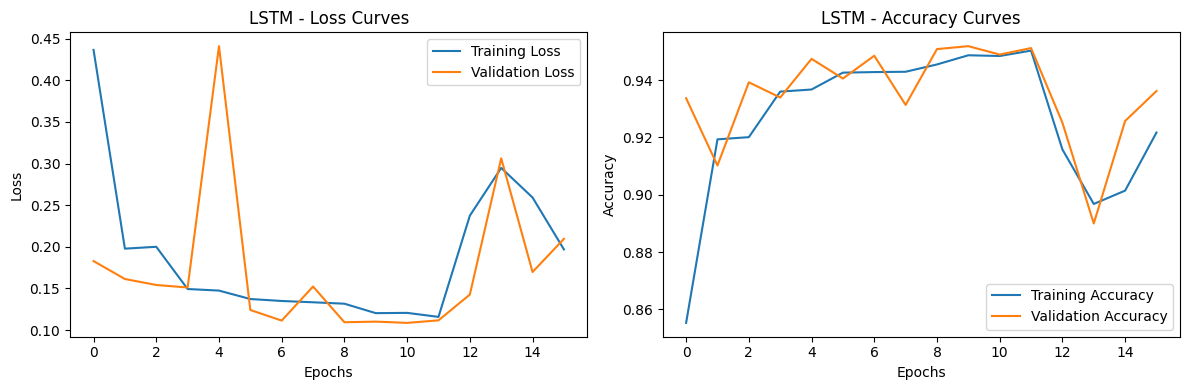

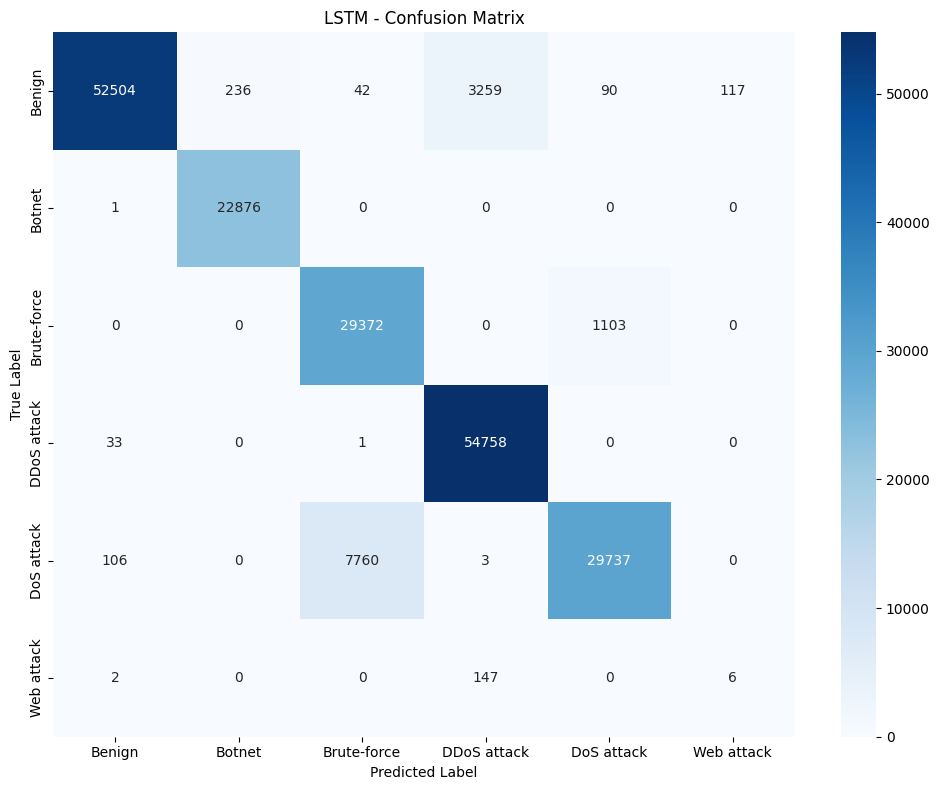

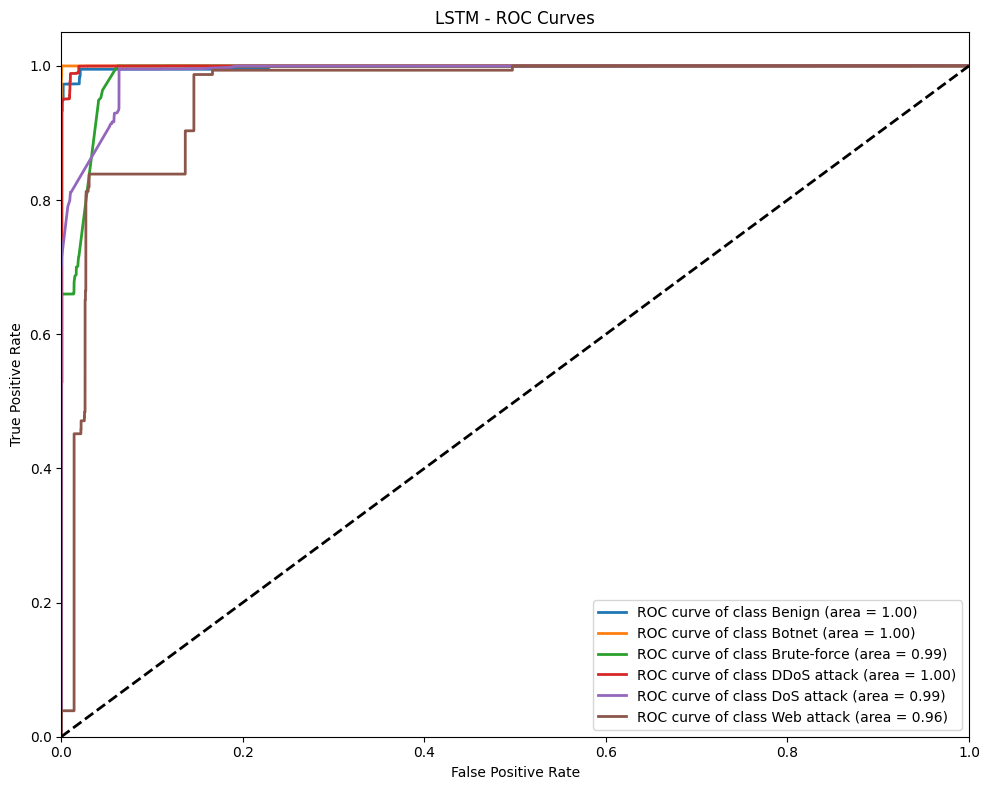


LSTM Results:
Accuracy: 0.9362

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.93      0.96     56248
      Botnet       0.99      1.00      0.99     22877
 Brute-force       0.79      0.96      0.87     30475
 DDoS attack       0.94      1.00      0.97     54792
  DoS attack       0.96      0.79      0.87     37606
  Web attack       0.05      0.04      0.04       155

    accuracy                           0.94    202153
   macro avg       0.79      0.79      0.78    202153
weighted avg       0.94      0.94      0.94    202153


Training CNN with Attention...
Epoch 5/30, Train Loss: 0.0908, Train Acc: 0.9629, Val Loss: 0.0808, Val Acc: 0.9664
Epoch 10/30, Train Loss: 0.0835, Train Acc: 0.9654, Val Loss: 0.0858, Val Acc: 0.9663
Epoch 15/30, Train Loss: 0.0826, Train Acc: 0.9655, Val Loss: 0.1442, Val Acc: 0.9668
Early stopping triggered after 18 epochs (no improvement for 5 epochs)


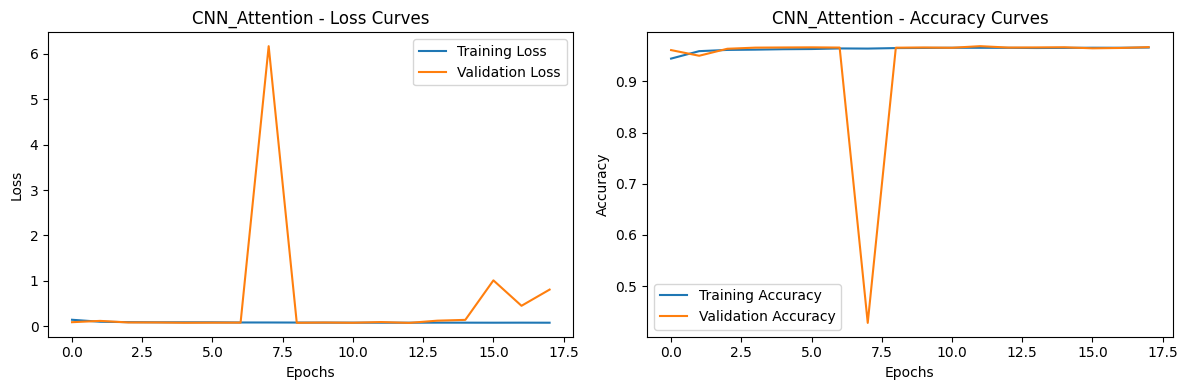

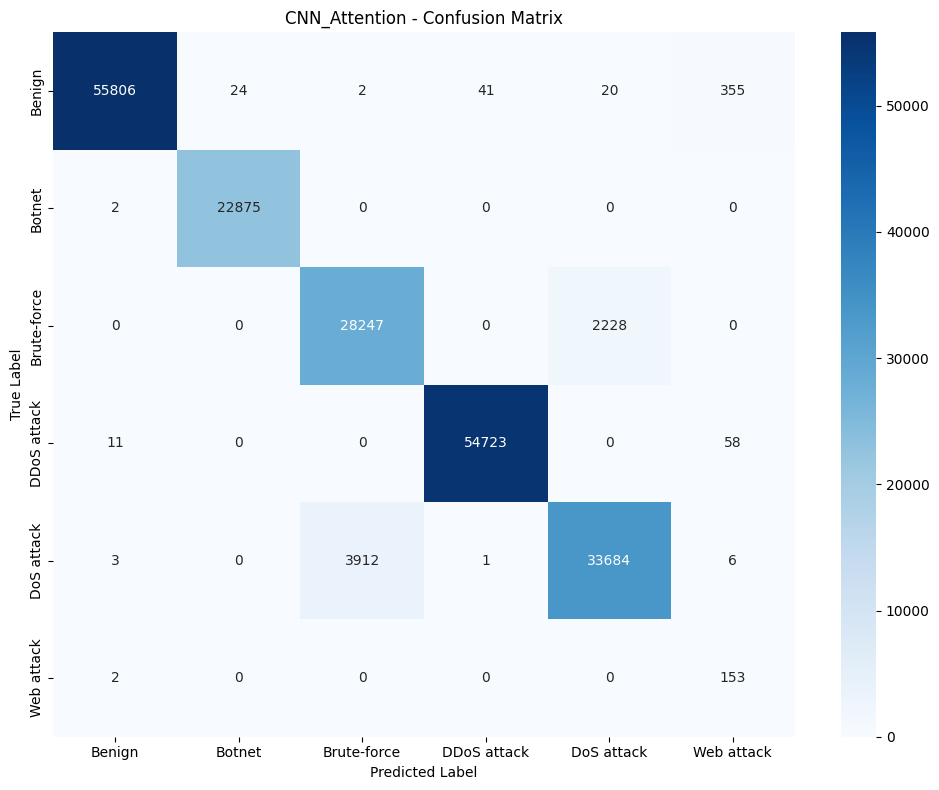

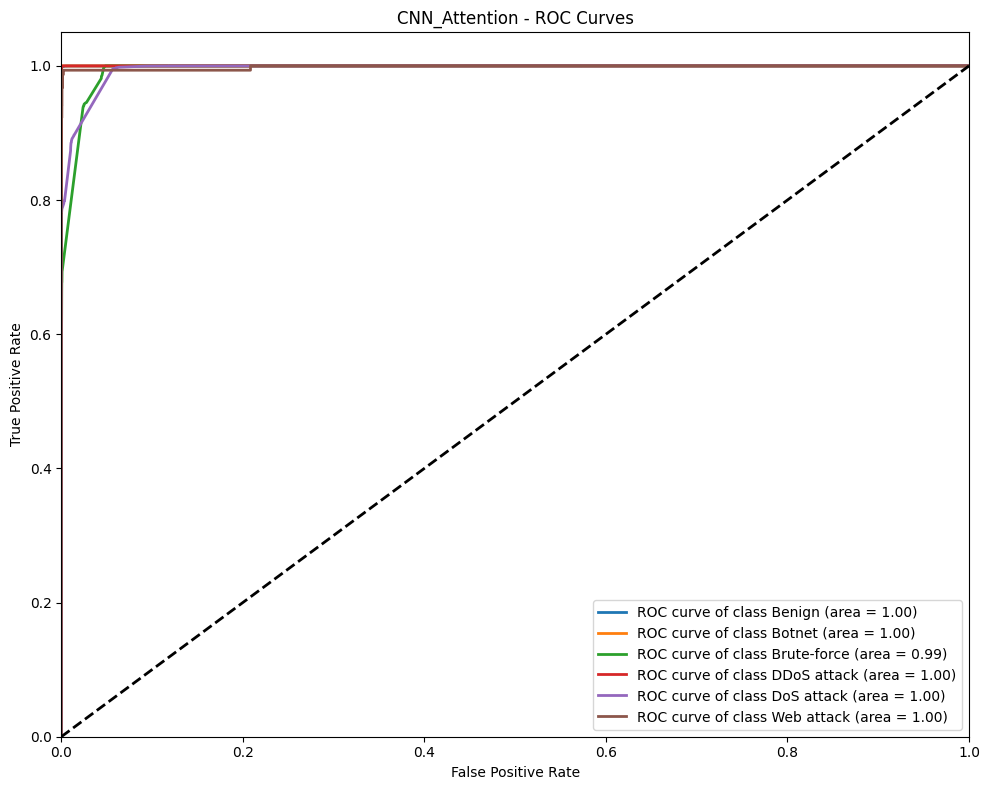


CNN_Attention Results:
Accuracy: 0.9670

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.99      1.00     56248
      Botnet       1.00      1.00      1.00     22877
 Brute-force       0.88      0.93      0.90     30475
 DDoS attack       1.00      1.00      1.00     54792
  DoS attack       0.94      0.90      0.92     37606
  Web attack       0.27      0.99      0.42       155

    accuracy                           0.97    202153
   macro avg       0.85      0.97      0.87    202153
weighted avg       0.97      0.97      0.97    202153


Training Deep NN with Attention...
Epoch 5/30, Train Loss: 0.0966, Train Acc: 0.9608, Val Loss: 0.1013, Val Acc: 0.9548
Early stopping triggered after 9 epochs (no improvement for 5 epochs)


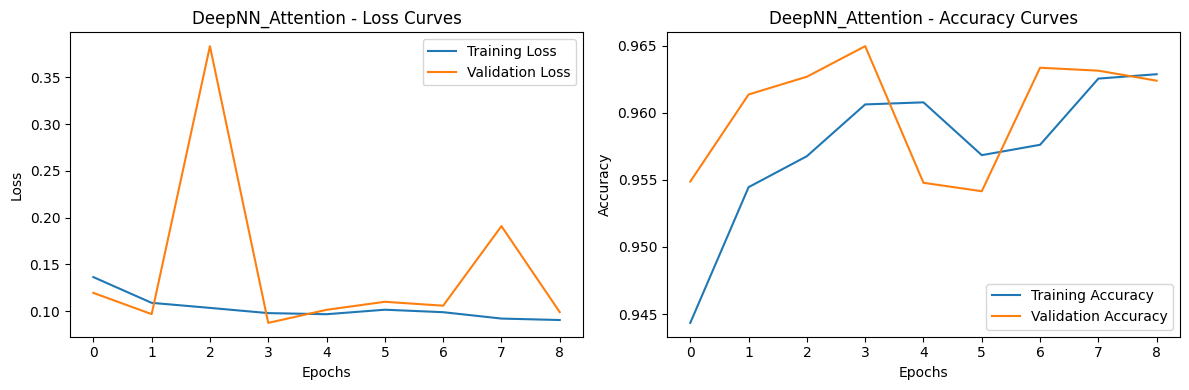

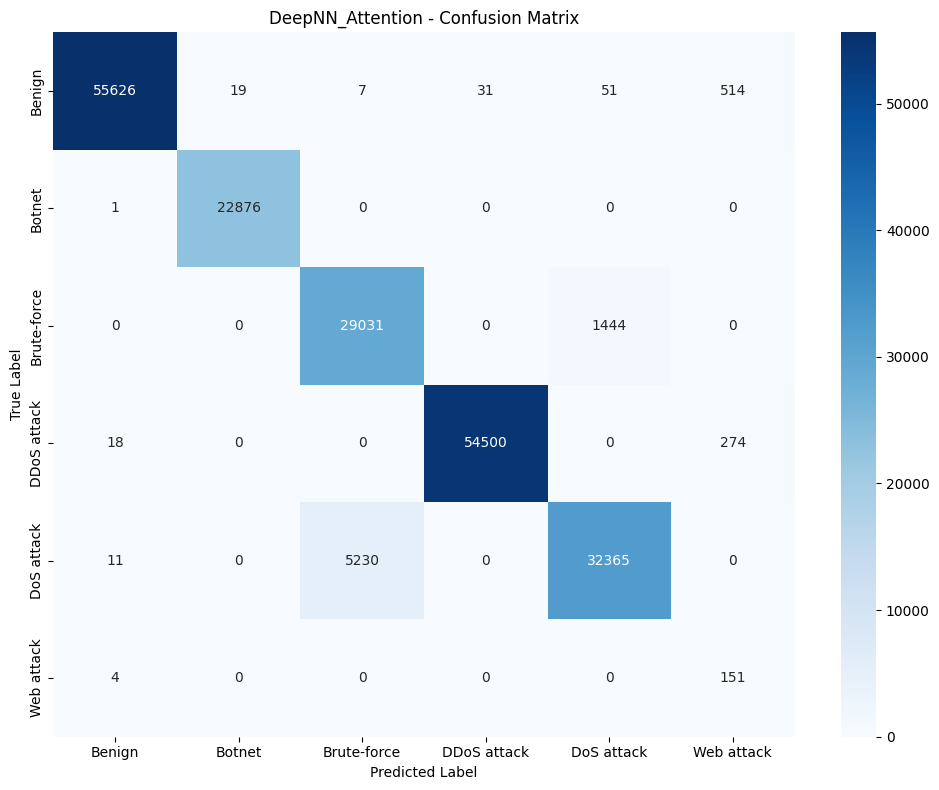

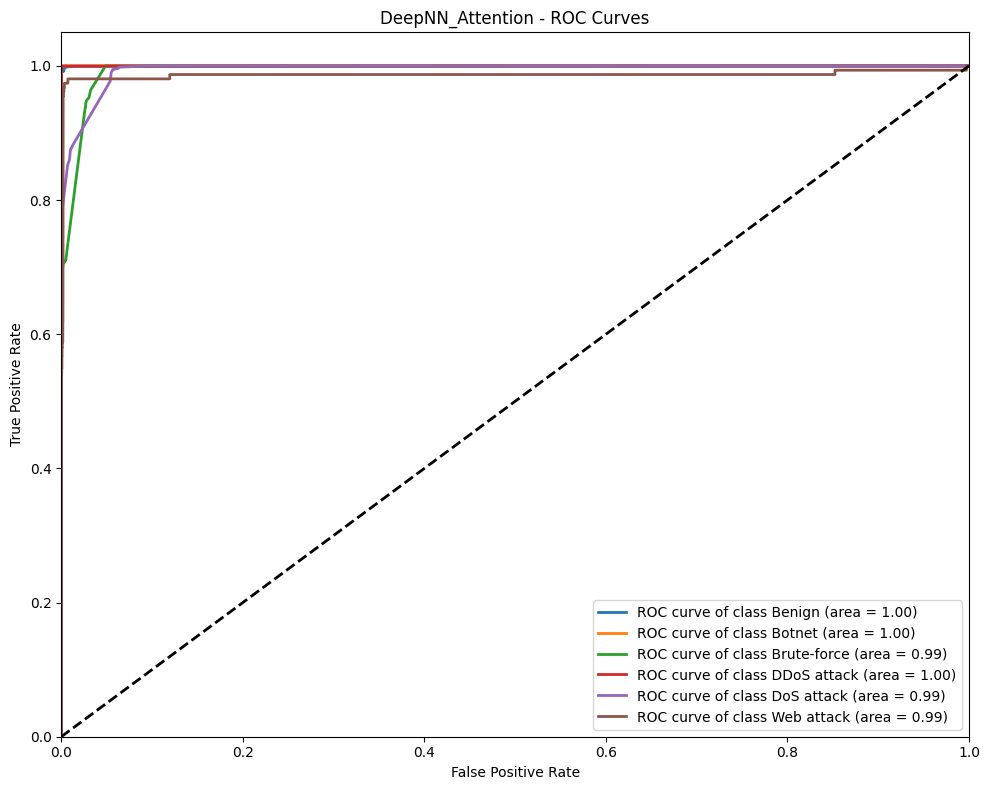


DeepNN_Attention Results:
Accuracy: 0.9624

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.99      0.99     56248
      Botnet       1.00      1.00      1.00     22877
 Brute-force       0.85      0.95      0.90     30475
 DDoS attack       1.00      0.99      1.00     54792
  DoS attack       0.96      0.86      0.91     37606
  Web attack       0.16      0.97      0.28       155

    accuracy                           0.96    202153
   macro avg       0.83      0.96      0.84    202153
weighted avg       0.97      0.96      0.96    202153


Training LSTM with Attention...
Epoch 5/30, Train Loss: 0.1195, Train Acc: 0.9496, Val Loss: 0.0921, Val Acc: 0.9609
Epoch 10/30, Train Loss: 0.0998, Train Acc: 0.9592, Val Loss: 0.0828, Val Acc: 0.9645
Epoch 15/30, Train Loss: 0.0905, Train Acc: 0.9628, Val Loss: 0.0802, Val Acc: 0.9669
Epoch 20/30, Train Loss: 0.0894, Train Acc: 0.9643, Val Loss: 0.0812, Val Acc: 0.9658
Early stoppin

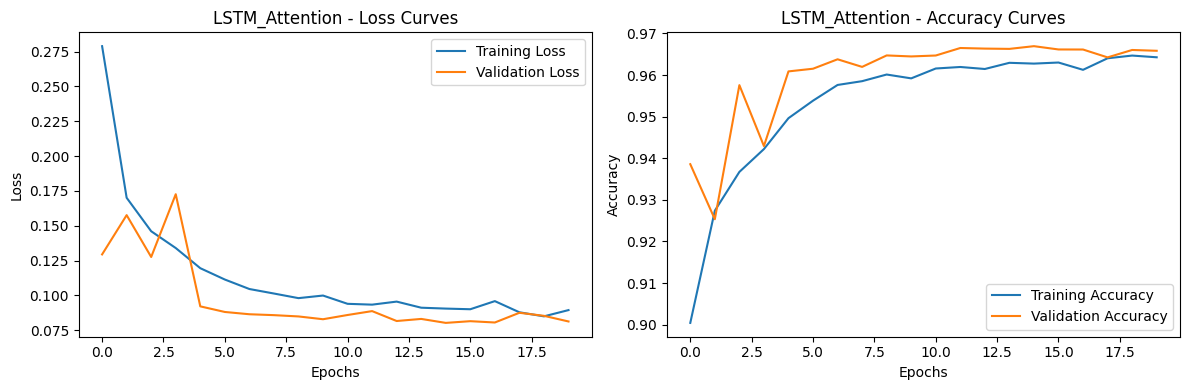

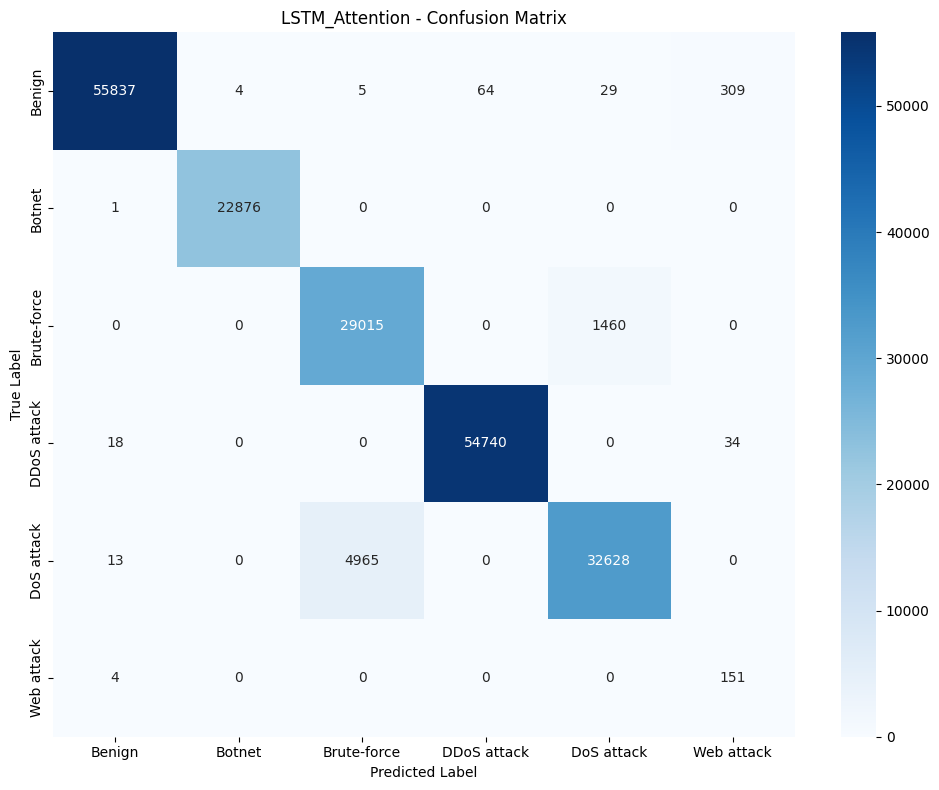

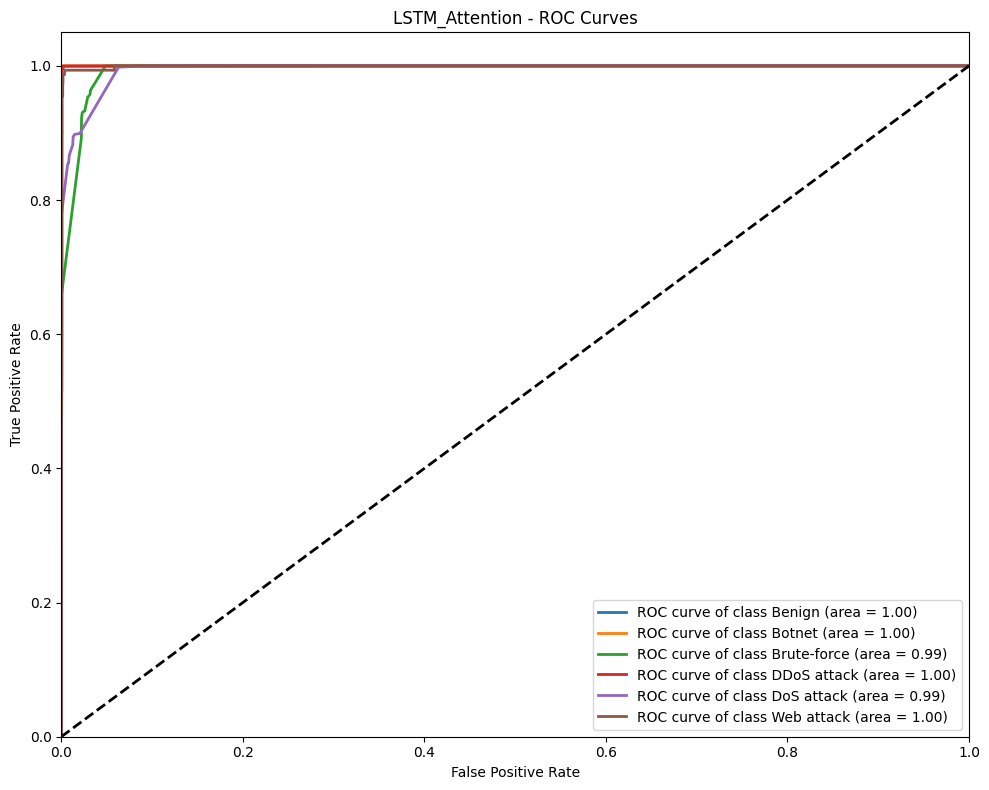


LSTM_Attention Results:
Accuracy: 0.9658

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.99      1.00     56248
      Botnet       1.00      1.00      1.00     22877
 Brute-force       0.85      0.95      0.90     30475
 DDoS attack       1.00      1.00      1.00     54792
  DoS attack       0.96      0.87      0.91     37606
  Web attack       0.31      0.97      0.47       155

    accuracy                           0.97    202153
   macro avg       0.85      0.96      0.88    202153
weighted avg       0.97      0.97      0.97    202153



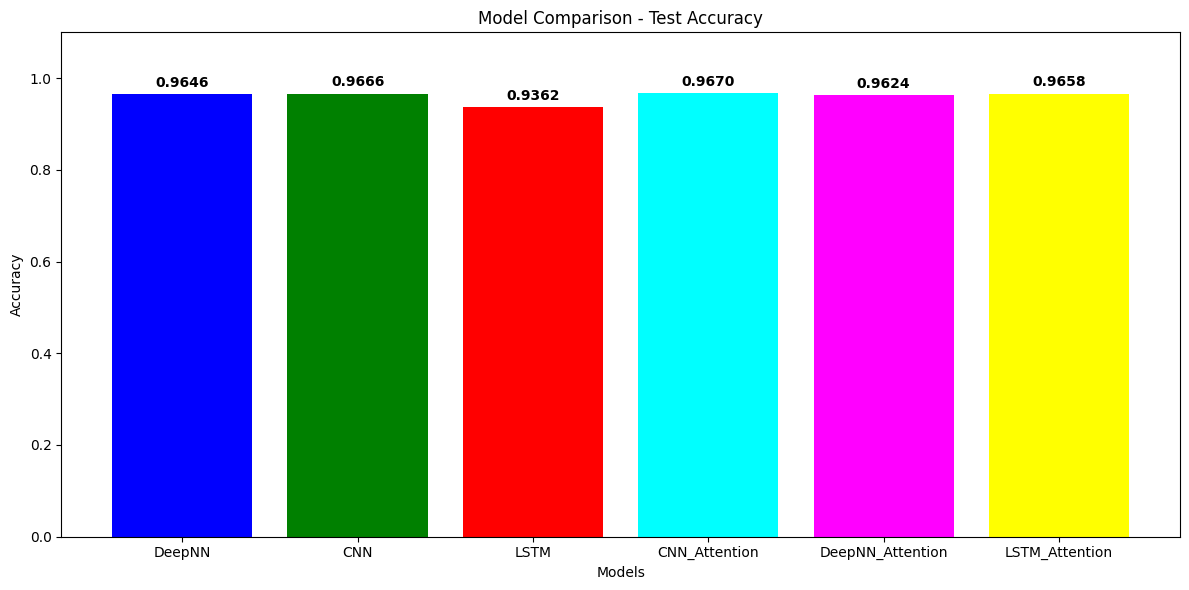


Model Comparison:
DeepNN: 0.9646
CNN: 0.9666
LSTM: 0.9362
CNN_Attention: 0.9670
DeepNN_Attention: 0.9624
LSTM_Attention: 0.9658


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.preprocessing import label_binarize

# Convert data to PyTorch tensors
X_train_torch = torch.tensor(train_df[feature_cols].values, dtype=torch.float32)
X_test_torch = torch.tensor(test_df[feature_cols].values, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

# Create PyTorch datasets and dataloaders
batch_size = 64
train_dataset = TensorDataset(X_train_torch, y_train_torch)
test_dataset = TensorDataset(X_test_torch, y_test_torch)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Get input dimensions
num_features = X_train_torch.shape[1]
num_classes = len(order_label_list)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Convert class weights to PyTorch tensor
class_weights_tensor = torch.tensor([class_weights[i] for i in range(len(class_weights))], dtype=torch.float32).to(device)

# Helper function to train and evaluate models
def train_and_evaluate(model, model_name, train_loader, test_loader, num_epochs=30, patience=5):
    model.to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_losses = []
    train_accs = []
    val_losses = []
    val_accs = []
    
    # Early stopping variables
    best_val_loss = float('inf')
    best_model_weights = None
    no_improve_epochs = 0
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)
        
        # Validation
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        epoch_val_loss = val_loss / len(test_loader)
        epoch_val_acc = val_correct / val_total
        val_losses.append(epoch_val_loss)
        val_accs.append(epoch_val_acc)
        
        if (epoch + 1) % 5 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}')
        
        # Early stopping check
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            best_model_weights = model.state_dict().copy()
            no_improve_epochs = 0
        else:
            no_improve_epochs += 1
            if no_improve_epochs >= patience:
                print(f"Early stopping triggered after {epoch+1} epochs (no improvement for {patience} epochs)")
                break
    
    # Load the best model weights
    if best_model_weights is not None:
        model.load_state_dict(best_model_weights)
    
    # Final evaluation
    model.eval()
    all_preds = []
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            probs = nn.Softmax(dim=1)(outputs)
            _, predicted = torch.max(outputs.data, 1)
            
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    
    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    report = classification_report(all_labels, all_preds, target_names=order_label_list)
    conf_matrix = confusion_matrix(all_labels, all_preds)
    
    # Plot learning curves
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title(f'{model_name} - Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Training Accuracy')
    plt.plot(val_accs, label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig(f'{model_name}_learning_curves.png')
    plt.show()
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=order_label_list, yticklabels=order_label_list)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig(f'{model_name}_confusion_matrix.png')
    plt.show()
    
    # Plot ROC curve for multi-class
    if num_classes > 2:
        # Binarize the labels for multi-class ROC
        y_test_bin = label_binarize(all_labels, classes=range(num_classes))
        all_probs = np.array(all_probs)
        
        plt.figure(figsize=(10, 8))
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], all_probs[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], lw=2,
                     label=f'ROC curve of class {order_label_list[i]} (area = {roc_auc[i]:.2f})')
        
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curves')
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.savefig(f'{model_name}_roc_curves.png')
        plt.show()
    else:
        # Binary classification ROC curve
        fpr, tpr, _ = roc_curve(all_labels, all_probs[:, 1])
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC Curve')
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.savefig(f'{model_name}_roc_curve.png')
        plt.show()
    
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(report)
    
    # Return history dictionary and accuracy
    history = {
        'train_losses': train_losses,
        'train_accs': train_accs,
        'val_losses': val_losses,
        'val_accs': val_accs,
        'accuracy': accuracy
    }
    
    return history, accuracy

# 1. Basic Deep Neural Network
class DeepNN(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim, dropout_rate=0.3):
        super(DeepNN, self).__init__()
        layers = []
        
        # Input layer
        layers.append(nn.Linear(input_dim, hidden_dims[0]))
        layers.append(nn.ReLU())
        layers.append(nn.BatchNorm1d(hidden_dims[0]))
        layers.append(nn.Dropout(dropout_rate))
        
        # Hidden layers
        for i in range(len(hidden_dims) - 1):
            layers.append(nn.Linear(hidden_dims[i], hidden_dims[i + 1]))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(hidden_dims[i + 1]))
            layers.append(nn.Dropout(dropout_rate))
        
        # Output layer
        layers.append(nn.Linear(hidden_dims[-1], output_dim))
        
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)

# 2. CNN for tabular data
class TabularCNN(nn.Module):
    def __init__(self, input_dim, num_classes, dropout_rate=0.3):
        super(TabularCNN, self).__init__()
        
        # Reshape the input for 1D convolution
        self.input_dim = input_dim
        
        # CNN layers
        self.conv_layers = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.MaxPool1d(kernel_size=2, stride=2),
            
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.MaxPool1d(kernel_size=2, stride=2),
            
            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.AdaptiveAvgPool1d(output_size=4)
        )
        
        # Calculate the flattened size after convolutions
        self.flatten_size = 128 * 4
        
        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(self.flatten_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(dropout_rate),
            
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(dropout_rate),
            
            nn.Linear(128, num_classes)
        )
    
    def forward(self, x):
        # Reshape for 1D convolution: [batch_size, 1, input_dim]
        x = x.unsqueeze(1)
        
        # Apply CNN layers
        x = self.conv_layers(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Apply fully connected layers
        x = self.fc_layers(x)
        
        return x

# 3. LSTM for tabular data
class TabularLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, num_classes, dropout_rate=0.3):
        super(TabularLSTM, self).__init__()
        
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # LSTM layer
        self.lstm = nn.LSTM(1, hidden_dim, num_layers, batch_first=True, dropout=dropout_rate if num_layers > 1 else 0)
        
        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(hidden_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(dropout_rate),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(dropout_rate),
            
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        # Reshape for LSTM: [batch_size, sequence_length (features), input_size (1)]
        x = x.unsqueeze(2)
        
        # Apply LSTM
        lstm_out, _ = self.lstm(x)
        
        # Take the output from the last time step
        lstm_out = lstm_out[:, -1, :]
        
        # Apply fully connected layers
        x = self.fc_layers(lstm_out)
        
        return x

# 4. Attention mechanism
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super(Attention, self).__init__()
        self.hidden_dim = hidden_dim
        self.attention = nn.Sequential(
            nn.Linear(hidden_dim, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
        )
    
    def forward(self, x):
        # x shape: [batch_size, seq_len, hidden_dim]
        # scores shape: [batch_size, seq_len, 1]
        scores = self.attention(x)
        
        # attention weights: [batch_size, seq_len, 1]
        weights = torch.softmax(scores, dim=1)
        
        # context vector: [batch_size, hidden_dim]
        context = torch.sum(weights * x, dim=1)
        
        return context, weights

# 5. CNN with Attention
class CNNWithAttention(nn.Module):
    def __init__(self, input_dim, num_classes, dropout_rate=0.3):
        super(CNNWithAttention, self).__init__()
        
        self.input_dim = input_dim
        
        # CNN layers
        self.conv_layers = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            
            nn.Conv1d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm1d(128)
        )
        
        # Attention mechanism
        self.attention = Attention(128)
        
        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(dropout_rate),
            
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(dropout_rate),
            
            nn.Linear(128, num_classes)
        )
    
    def forward(self, x):
        # Reshape for 1D convolution: [batch_size, 1, input_dim]
        x = x.unsqueeze(1)
        
        # Apply CNN layers
        x = self.conv_layers(x)
        
        # Transpose to [batch_size, seq_len, channels]
        x = x.transpose(1, 2)
        
        # Apply attention
        x, _ = self.attention(x)
        
        # Apply fully connected layers
        x = self.fc_layers(x)
        
        return x

# 6. Deep NN with Attention
class DeepNNWithAttention(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim, dropout_rate=0.3):
        super(DeepNNWithAttention, self).__init__()
        
        self.input_dim = input_dim
        
        # Initial embedding layer
        self.embedding = nn.Sequential(
            nn.Linear(input_dim, hidden_dims[0]),
            nn.ReLU(),
            nn.BatchNorm1d(hidden_dims[0])
        )
        
        # Reshape for attention
        self.hidden_dim = hidden_dims[0]
        
        # Attention mechanism
        self.attention = Attention(self.hidden_dim)
        
        # Fully connected layers
        fc_layers = []
        
        for i in range(len(hidden_dims) - 1):
            fc_layers.append(nn.Linear(hidden_dims[i], hidden_dims[i + 1]))
            fc_layers.append(nn.ReLU())
            fc_layers.append(nn.BatchNorm1d(hidden_dims[i + 1]))
            fc_layers.append(nn.Dropout(dropout_rate))
        
        fc_layers.append(nn.Linear(hidden_dims[-1], output_dim))
        
        self.fc_layers = nn.Sequential(*fc_layers)
    
    def forward(self, x):
        # Apply embedding
        batch_size = x.size(0)
        x = self.embedding(x)
        
        # Reshape for attention: [batch_size, input_dim, hidden_dim]
        x = x.unsqueeze(1).repeat(1, self.input_dim, 1)
        
        # Apply attention
        x, _ = self.attention(x)
        
        # Apply fully connected layers
        x = self.fc_layers(x)
        
        return x

# 7. LSTM with Attention
class LSTMWithAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, num_classes, dropout_rate=0.3):
        super(LSTMWithAttention, self).__init__()
        
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # LSTM layer
        self.lstm = nn.LSTM(1, hidden_dim, num_layers, batch_first=True, bidirectional=True, dropout=dropout_rate if num_layers > 1 else 0)
        
        # Attention mechanism
        self.attention = Attention(hidden_dim * 2)  # * 2 for bidirectional
        
        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(hidden_dim * 2, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(dropout_rate),
            
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(dropout_rate),
            
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        # Reshape for LSTM: [batch_size, sequence_length (features), input_size (1)]
        x = x.unsqueeze(2)
        
        # Apply LSTM
        lstm_out, _ = self.lstm(x)
        
        # Apply attention
        attn_out, _ = self.attention(lstm_out)
        
        # Apply fully connected layers
        x = self.fc_layers(attn_out)
        
        return x

# Train and evaluate all models
print("Training Deep Neural Network...")
dnn_model = DeepNN(
    input_dim=num_features,
    hidden_dims=[256, 128, 64],
    output_dim=num_classes
)
dnn_history, dnn_accuracy = train_and_evaluate(dnn_model, "DeepNN", train_loader, test_loader, num_epochs=30, patience=5)

print("\nTraining CNN...")
cnn_model = TabularCNN(
    input_dim=num_features,
    num_classes=num_classes
)
cnn_history, cnn_accuracy = train_and_evaluate(cnn_model, "CNN", train_loader, test_loader, num_epochs=30, patience=5)

print("\nTraining LSTM...")
lstm_model = TabularLSTM(
    input_dim=num_features,
    hidden_dim=128,
    num_layers=2,
    num_classes=num_classes
)
lstm_history, lstm_accuracy = train_and_evaluate(lstm_model, "LSTM", train_loader, test_loader, num_epochs=30, patience=5)

print("\nTraining CNN with Attention...")
cnn_attn_model = CNNWithAttention(
    input_dim=num_features,
    num_classes=num_classes
)
cnn_attn_history, cnn_attn_accuracy = train_and_evaluate(cnn_attn_model, "CNN_Attention", train_loader, test_loader, num_epochs=30, patience=5)

print("\nTraining Deep NN with Attention...")
dnn_attn_model = DeepNNWithAttention(
    input_dim=num_features,
    hidden_dims=[256, 128, 64],
    output_dim=num_classes
)
dnn_attn_history, dnn_attn_accuracy = train_and_evaluate(dnn_attn_model, "DeepNN_Attention", train_loader, test_loader, num_epochs=30, patience=5)

print("\nTraining LSTM with Attention...")
lstm_attn_model = LSTMWithAttention(
    input_dim=num_features,
    hidden_dim=128,
    num_layers=2,
    num_classes=num_classes
)
lstm_attn_history, lstm_attn_accuracy = train_and_evaluate(lstm_attn_model, "LSTM_Attention", train_loader, test_loader, num_epochs=30, patience=5)

# Add a simple EarlyStopping class for potential future use
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last improvement.
            verbose (bool): If True, prints a message for each improvement.
            delta (float): Minimum change to qualify as an improvement.
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = float('inf')
        self.delta = delta

    def __call__(self, val_loss, model):
        score = -val_loss  # Higher score is better

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        """Saves model when validation loss decreases."""
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model...')
        self.best_model_weights = model.state_dict().copy()
        self.val_loss_min = val_loss

# Compare all models
models = ["DeepNN", "CNN", "LSTM", "CNN_Attention", "DeepNN_Attention", "LSTM_Attention"]
accuracies = [dnn_accuracy, cnn_accuracy, lstm_accuracy, cnn_attn_accuracy, dnn_attn_accuracy, lstm_attn_accuracy]

plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])

# Add accuracy values on top of bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc:.4f}', 
             ha='center', va='bottom', fontweight='bold')

plt.title('Model Comparison - Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

print("\nModel Comparison:")
for model_name, acc in zip(models, accuracies):
    print(f"{model_name}: {acc:.4f}")